<img src="http://www.cidaen.es/assets/img/mCIDaeNnb.png" alt="Logo CiDAEN" align="right">




<br><br><br>
<h2><font color="#00586D" size=4>Capstone I</font></h2>

<h1><font color="#00586D" size=5>Formula 1 data analysis</font></h1>
<br><br><br>


<div align="right">
<font color="#00586D" size=3>Luis de la Ossa</font><br>
<font color="#00586D" size=3>Master in Data Science and Data Engineering in the Cloud</font><br>
<font color="#00586D" size=3>University of Castilla-La Mancha</font>

</div>

---

<a id="indice"></a>
<h2><font color="#00586D" size=5>Index</font></h2>


*[1. Introduction](#section1)* [2. Drivers](#section2)
*[3. Careers](#section3)* [4. Teams](#section4)
*[5. Circuits](#section5)* [6. Fernando Alonso vs rivals](#section6)
* [7. Conclusions and lines of work for TFM](#section7)

---

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container {width:95%} </style>"))
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

C:\Users\laura\AppData\Local\Temp\ipykernel_17388\2081842701.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


---

<a id="section1"></a>
## <font color="#00586D"> 1. Introduction</font>
<br>

In this first project of the master's degree, we will work with information about the *Formula 1* competition generated from 1950 until this season. The data set has been downloaded from Kaggle [(link)](https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020), although in turn the author collected them from the site ` ergast.com`, which is a Formula 1 database that provides an API for the query [(link)](http://ergast.com/mrd/).

From this data set, made up of 14 `.csv` files, a series of general questions will be answered. Also, as a more specific objective, a vision of the career (so far) of the Spanish driver Fernando Alonso in this competition will be provided.

The focus of this work, as of the first module as a whole, is primarily ***instrumental***. Therefore, instead of carrying out an exploratory analysis of the data as such (we will do this in Capstone III), a series of exercises will be addressed whose resolution will involve manipulating different*DataFrames*, and will allow us to put into Practice the skills acquired with*pandas*and*matplotlib*. Specifically, the focus will be on*pandas*, since the visualization will be worked on in the corresponding modules.

Finally, and because this is the first of several projects,**workload is important**. However, we encourage you to expand the work and build some more graphs in relation to some aspect that awakens your curiosity. Furthermore, since**a possible line of TFM is the preparation of a portfolio** with expansion of the work of the different modules, you can focus this additional work on that line.

<div class="alert alert-block alert-info">
    
The text marked as <i class="fa fa-info-circle" aria-hidden="true"></i> corresponds to a drop-down menu with ***suggestions*** that can help solve the exercises. We encourage you, however, to try to solve them before reading them.
</div>

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section2"></a>
## <font color="#00586D"> 2. Drivers</font>
<br>

The `data/drivers.csv` file contains basic identifying information about the drivers. Because the project will also focus on a specific driver, 'Fernando Alonso', this information will be discussed first.

### <font size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 1</font>

Load the data from the `data/drivers.csv` file into a *DataFrame* called `df_drivers`, display the header and, subsequently, the information about the structure of the *DataFrame*.
<br><br>




In [2]:
df_drivers = pd.read_csv('data/drivers.csv')
df_drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [3]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB



In the information of the *DataFrame* it can be seen that a column, `driverId`, corresponds to the identifier and has been encoded as an integer. The rest have been encoded as objects, including the number (`number`) or the date of birth (`dob`). Furthermore, it is appreciated that nationality could be treated as a category. Although all of these changes could be made using operations (`DataFrame.set_index()` and `DataFrame.astype()`), it seems more convenient to read the file again.



Reload the file `data/drivers.csv` into a *DataFrame* named `df_drivers`. Now use the first column (`driverId`) as an index, which contains the individual identifier of each driver. Specify that missing values ​​are represented as `'\N'`, and that the data type of the `driverRef`, `code`, `forename`, and `surname` columns must be `string`. Also specify that `nationality` is a category, and indicate to treat the `dob` column as temporary data using the `parse_dates` parameter of `pd.read_csv()`.



In [4]:
new_types = {"driverRef":"string", 
             "code":"string", 
             "forename":"string", 
             "surname":"string", 
             "nationality": "category"}

df_drivers = pd.read_csv('data/drivers.csv', dtype=new_types, na_values=r'\N', index_col='driverId', parse_dates=['dob'])

df_drivers.head()

,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,
1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 854 entries, 1 to 855
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   driverRef    854 non-null    string        
 1   number       51 non-null     float64       
 2   code         97 non-null     string        
 3   forename     854 non-null    string        
 4   surname      854 non-null    string        
 5   dob          854 non-null    datetime64[ns]
 6   nationality  854 non-null    category      
 7   url          854 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(1), object(1), string(4)
memory usage: 55.6+ KB


Extract the data related to the driver `Fernando Alonso`, whose code is `ALO`, and store it in a *Series* called `alonso_data`. Store the identifier corresponding to the pilot in the variable `alonso_id`.



In [6]:
alonso_data = df_drivers[df_drivers["code"]=="ALO"].squeeze()
alonso_id = alonso_data.name

In [7]:
alonso_data

driverRef                                            alonso
number                                                 14.0
code                                                    ALO
forename                                           Fernando
surname                                              Alonso
dob                                     1981-07-29 00:00:00
nationality                                         Spanish
url            http://en.wikipedia.org/wiki/Fernando_Alonso
Name: 4, dtype: object

In [8]:
alonso_id

4

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->



### <font  size=3 color=#00586D> <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Exercise 2</font>

Show the rows of `df_drivers` corresponding to the five youngest drivers.



In [9]:
df_drivers.sort_values("dob", ascending=False).head(5)

,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,
852,tsunoda,22.0,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
846,norris,4.0,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris
855,zhou,24.0,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
854,mick_schumacher,47.0,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,mazepin,9.0,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin


Create, using *matplotlib*, a bar graph that represents the number of drivers of each nationality in the *DataFrame* `df_drivers`. Use only data from the 20 nations for which there are the most pilots, add the title to the figure, and set the x-axis scale labels (*ticks*) to be readable.




In [10]:
counter= df_drivers["nationality"].value_counts(ascending=False).head(20)

Text(0, 0.5, 'No. of drivers')

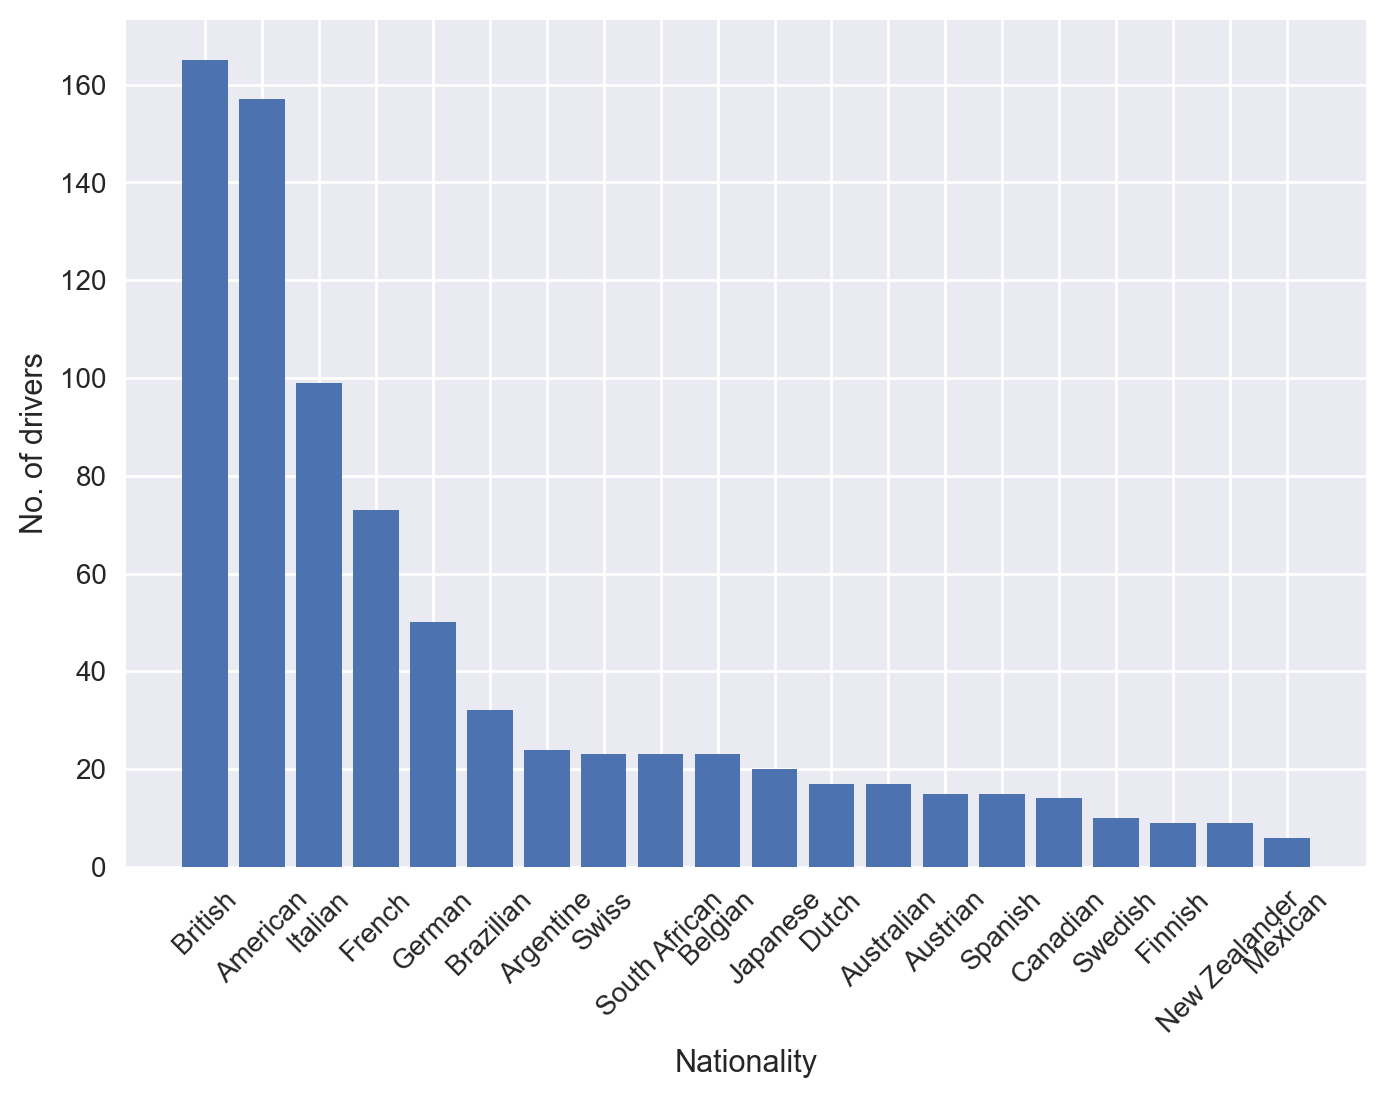

In [11]:
plt.bar(counter.index, counter.values)
#ax.xaxis.set_tick_params(pad = 5)
plt.xticks(rotation = 45)
plt.xlabel("Nationality")
plt.ylabel("No. of drivers")

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section3"></a>
## <font color="#00586D"> 3. Careers</font>
<br>

Once the data related to drivers has been obtained, we will work with the most important source of information in this set of data: the results of the races, which are collected in the file `data/results.csv`. Each row contains information about the participation of a driver (`driverId`) in a race (`raceId`). In addition to the position, it contains information related to times, fastest lap, highest speed, etc., which will also allow other analyzes to be carried out later.

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 3</font>

The file `data/results.csv` contains the results of all races. Load the data into the *DataFrame* `df_results`. Use the first column (`resultId`) as an index. Specify, as above, that missing values ​​are represented by `'\N'`. Show the header.




In [12]:
df_results = pd.read_csv('data/results.csv', index_col='resultId',na_values=r'\N')
df_results.head()

,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
resultId,,,,,,,,,,,,,,,,,
1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1


Draw a histogram (with *matplotlib*) with the number of races (results) per driver. Use 100 intervals. What is appreciated?

In [13]:
df_results["driverId"].value_counts()

8      352
4      349
22     326
18     309
30     308
      ... 
674      1
448      1
676      1
678      1
325      1
Name: driverId, Length: 854, dtype: int64

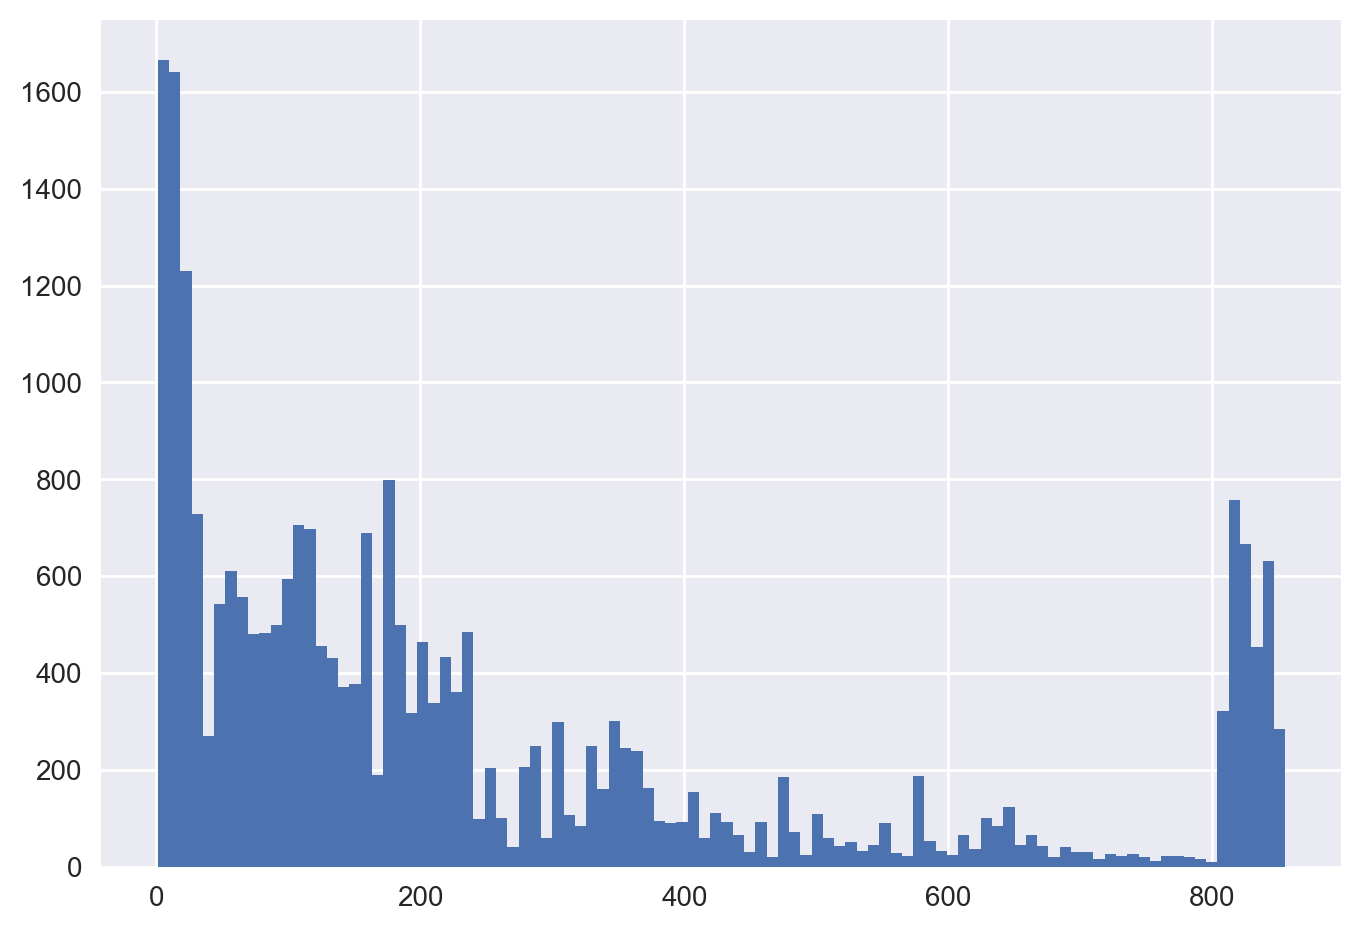

In [14]:
plt.hist(df_results["driverId"], bins=100)
plt.show()

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 4</font>

The data set `data/races.csv` contains information regarding each of the races. Store it in a *DataFrame* named `df_races`, using the `raceId` column (the first one) as an index. Specify that the `date` field is to be considered a date. Use the `parse_dates` parameter to do this. Inspect the *DataFrame*.

In [15]:
df_races = pd.read_csv('data/races.csv', index_col='raceId', parse_dates=['date'], na_values=r'\N')

df_races.head()

,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
raceId,,,,,,,,,,,,,,,,,
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Inspecting the *DataFrame* shows that the `time` column is expressed as a text string. Generate a new *Series* with the `time` column values ​​converted to timestamps. What is appreciated?




In [16]:
pd.to_datetime(df_races["time"])
#Al utilizar pd.to_datetime() se aprecia que convertimos la cadena de texto a unos datos de tipo datetime64[ns]

raceId
1      2023-01-21 06:00:00
2      2023-01-21 09:00:00
3      2023-01-21 07:00:00
4      2023-01-21 12:00:00
5      2023-01-21 12:00:00
               ...        
1092   2023-01-21 05:00:00
1093   2023-01-21 19:00:00
1094   2023-01-21 20:00:00
1095   2023-01-21 18:00:00
1096   2023-01-21 13:00:00
Name: time, Length: 1079, dtype: datetime64[ns]

Create a column called `df_races[date time]` that represents the date and time each race took place. To do this, it is necessary to convert the content of the `time` column to `TimeDelta`, and add it to the `date` column.





In [17]:
df_races['date time'] = pd.to_timedelta(df_races["time"])+df_races["date"]
df_races.head()

,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,date time
raceId,,,,,,,,,,,,,,,,,,
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-03-29 06:00:00
2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-04-05 09:00:00
3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-04-19 07:00:00
4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-04-26 12:00:00
5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-10 12:00:00


Remove the `date` and `time` columns. Also those relating to free training hours (`fpx_`), qualifications (`qualy_`) and sprints (`sprint_`). Move the new column, `date time`, to the position `date` occupied. That is, the resulting *DataFrame* must have 5 columns: `year`, `round`, `circuitId`, `date time` and `url`.

In [18]:
df_races = df_races[["year","round","circuitId","date time","url"]]
df_races.head()

,year,round,circuitId,date time,url
raceId,,,,,
1,2009,1,1,2009-03-29 06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
2,2009,2,2,2009-04-05 09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
3,2009,3,17,2009-04-19 07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
4,2009,4,3,2009-04-26 12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
5,2009,5,4,2009-05-10 12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 5</font>

Create a figure with two bar graphs. The one on the left shows the races that have taken place in each month of the year. In the one on the right, those that have taken place in each hour. Both graphs must share the scale on the *y* axis.





In [19]:
races_month = df_races['date time'].dt.month
races_hour = df_races['date time'].dt.hour

Text(0.5, 0, 'Hour')

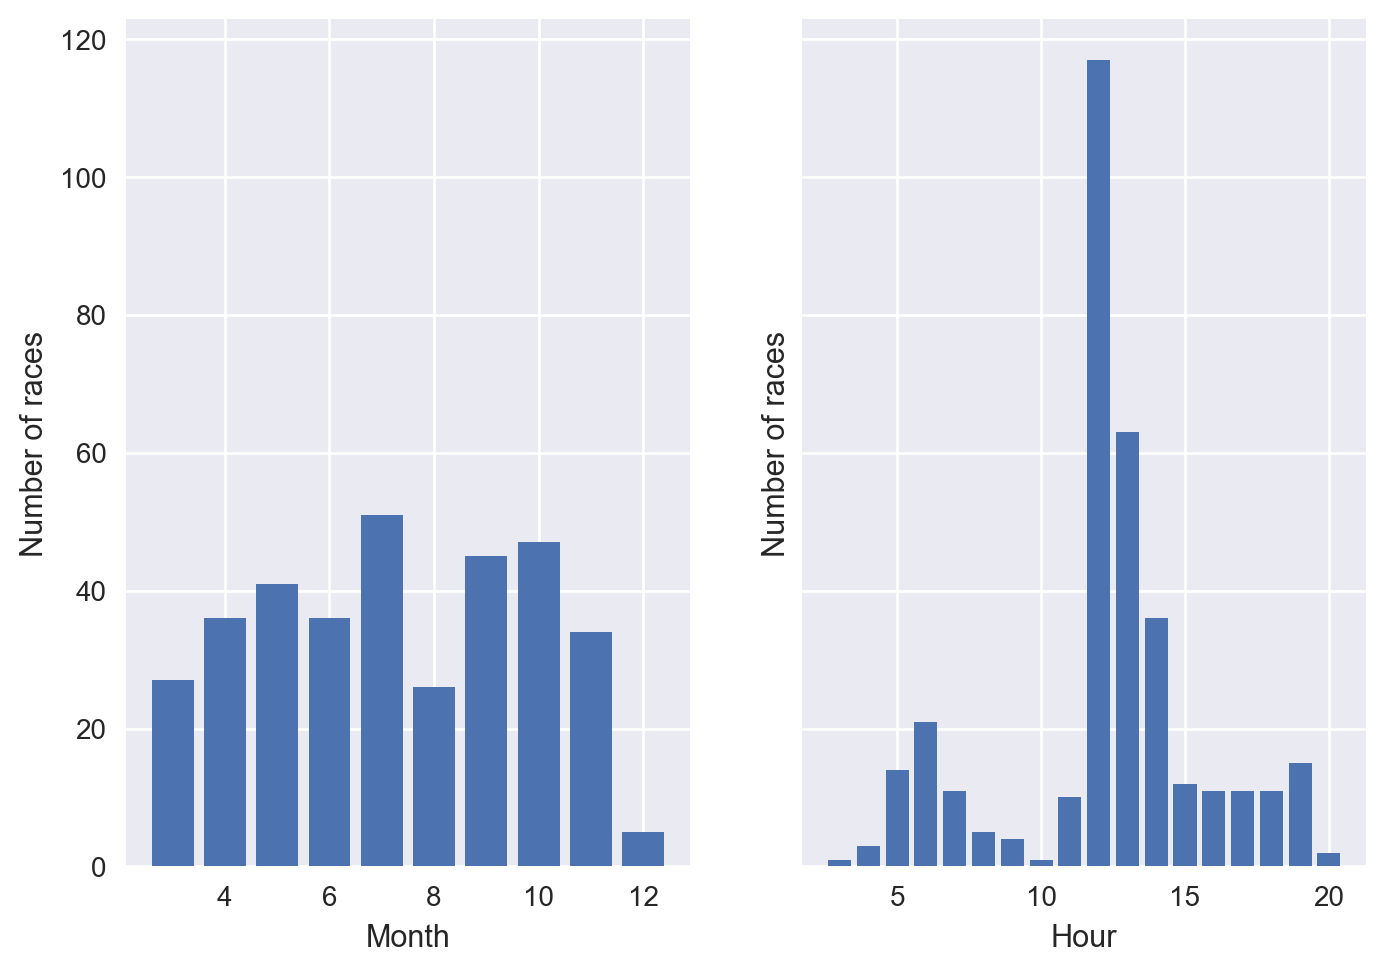

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.bar(races_month.value_counts().index,races_month.value_counts().values)
ax1.set_ylabel('Number of races')
ax1.set_xlabel('Month')
ax2.bar(races_hour.value_counts().index,races_hour.value_counts().values)
ax2.set_ylabel('Number of races')
ax2.set_xlabel('Hour')

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 6</font>

The `statusId` column of `df_results` contains a numerical code that represents the status in which each car/driver concluded each race. The data set `data/status.csv` contains the status description. Read this file and store it in the *DataFrame*. `df_status`.

In [21]:
df_status = pd.read_csv('data/status.csv')
df_status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray


Use both *DataFrames*, `df_results` and `df_status`, to create a pie chart displaying the 10 most frequent causes that have prevented pilots from completing the tasks. careers. Use a figure size $6 \times 6$.





In [22]:
ocurrencias = pd.merge(df_results, df_status, on="statusId")["status"].value_counts(ascending=False).head(11).drop(labels=['Finished'])

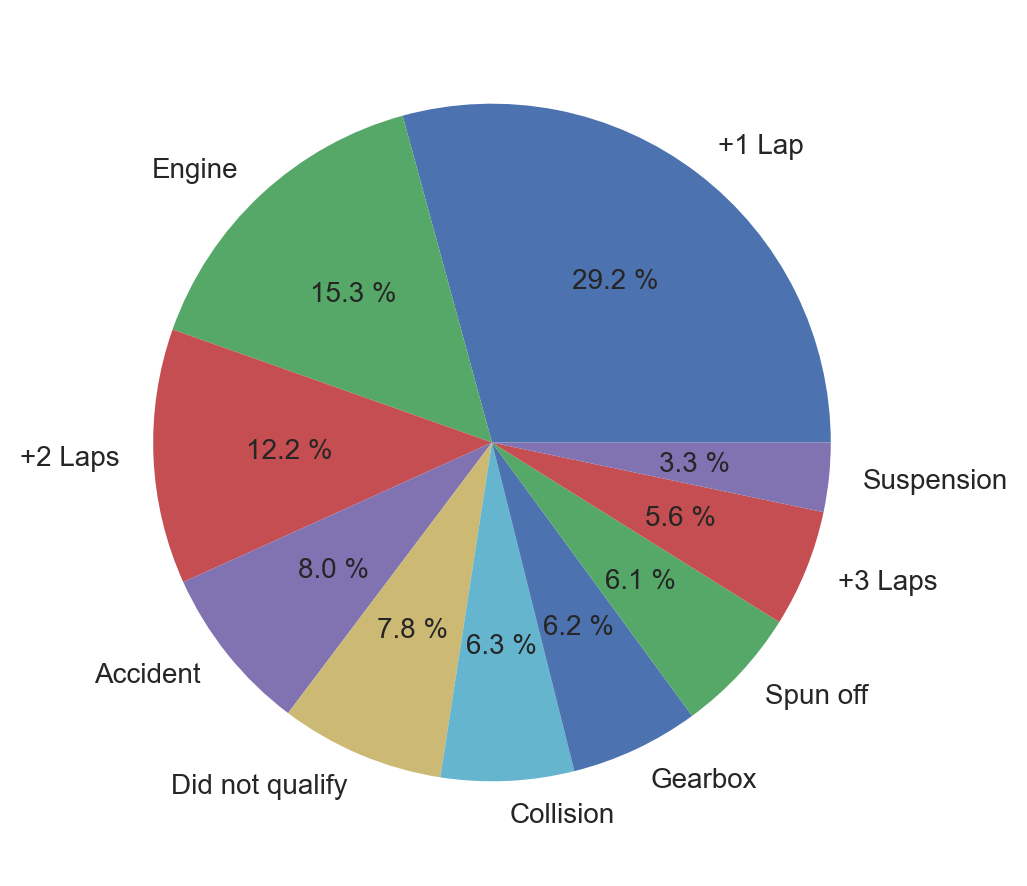

<Figure size 600x600 with 0 Axes>

In [23]:
plt.pie(ocurrencias, labels=ocurrencias.index, autopct="%0.1f %%")

plt.figure(figsize=(6,6))

plt.show()

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->



### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 7</font>

Show the name, surname, nationality and number of victories of the five drivers who have accumulated the most victories.

In [24]:
(

    df_results[df_results['position']==1]

    .groupby('driverId').size().nlargest(5).to_frame().rename(columns={0:'wins'})

    .merge(df_drivers, on="driverId")

    [['forename', 'surname', 'nationality','wins']]

)

,forename,surname,nationality,wins
driverId,,,,
1,Lewis,Hamilton,British,103
30,Michael,Schumacher,German,91
20,Sebastian,Vettel,German,53
117,Alain,Prost,French,51
102,Ayrton,Senna,Brazilian,41


Show the name, surname, nationality and number *pole positions* of the five drivers who have won the most qualifying sessions. The position of a driver in the qualification of each race is given by the 'grid' column.



In [25]:
(

    df_results[df_results['grid']==1]

    .groupby('driverId').size().nlargest(5).to_frame().rename(columns={0:'poles'})

    .merge(df_drivers, on="driverId")

    [['forename', 'surname', 'nationality','poles']]

)

,forename,surname,nationality,poles
driverId,,,,
1,Lewis,Hamilton,British,103
30,Michael,Schumacher,German,68
102,Ayrton,Senna,Brazilian,65
20,Sebastian,Vettel,German,57
373,Jim,Clark,British,34


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 8</font>

When data analysis focuses on a category or subset of data obtained through conditional selection, it may be convenient to store this intermediate result in a *DataFrame*. Furthermore, if you are not going to write about it, it is not necessary to make a copy, but you can make an assignment (Annex I of the tutorial). Store the results corresponding to races finished by `Fernando Alonso` in a *DataFrame* called `df_results_alo`. Show how many there are.



In [26]:
df_driverpos= pd.merge(df_results,df_drivers, on="driverId")

df_results_alo = df_driverpos[(df_driverpos["forename"]=="Fernando") & (df_driverpos["surname"]=="Alonso") & (df_driverpos["statusId"]==1)]

print('Número de carreras terminadas: ', len(df_results_alo))

Número de carreras terminadas:  220


The `position` column of the *DataFrame* `df_results` (and of `df_results_alo`) contains the position a driver placed in the corresponding race. Obtain the number of podiums (first, second and third positions) that 'Fernando Alonso' made throughout his sporting career (so far).




In [27]:
df_results_alo[df_results_alo["position"].between(1,3)]["position"].value_counts()

2.0    37
1.0    32
3.0    29
Name: position, dtype: int64

Show the number of occasions in which `Fernando Alonso` occupied positions one to four at the start (first and second rows).

In [28]:
df_results_alo[df_results_alo["grid"].between(1,4)]["grid"].value_counts()

3    25
4    21
1    21
2    13
Name: grid, dtype: int64

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 9</font>

Due to the importance of the cars, one of the factors that allow a driver's performance to be rated is the positions he gains or loses with respect to the starting position. Calculate this result for each driver/race, and draw a histogram with the distribution of values, but only for the drivers *who finished each race*. What reading could be made of the histogram?



<AxesSubplot: ylabel='Frequency'>

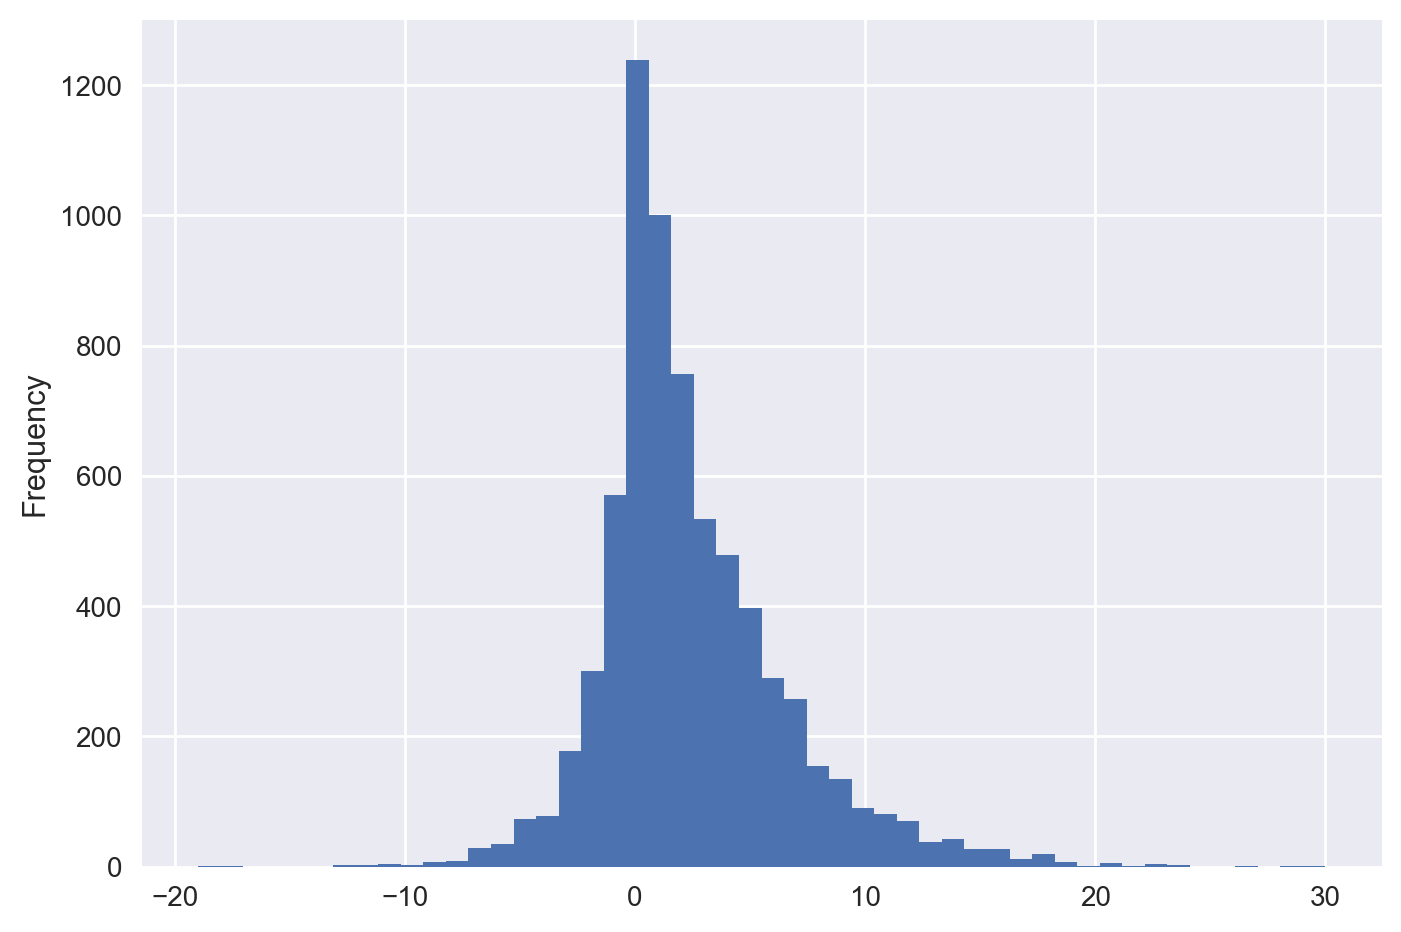

In [29]:
(
    df_driverpos.assign(pos_won= df_driverpos["grid"]- df_driverpos["position"])
    
    [df_driverpos["statusId"]==1]
    
    ["pos_won"].plot.hist(bins=50)
    
)

<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 10</font>

Calculate the positions that, on average, the drivers have won **in the completed races**. Show the result for the five pilots who stand out the most in this aspect, along with their name, surname and nationality.

    


In [30]:
(
    df_driverpos.assign(pos_won= df_driverpos["grid"]- df_driverpos["position"])[df_driverpos["statusId"]==1]
    
    .groupby("driverId")["pos_won"].mean().nlargest(5).to_frame()
    
    .merge(df_drivers, how="left", left_index=True, right_index=True)
    
    [["forename", "surname", "nationality","pos_won"]]
    
)

,forename,surname,nationality,pos_won
driverId,,,,
659,Jerry,Hoyt,American,24.0
734,Bobby,Ball,American,24.0
560,Bill,Cheesbourg,American,23.0
591,George,Amick,American,23.0
613,Marshall,Teague,American,21.0


How many races has the most outstanding driver in this aspect competed and concluded?

In [31]:
(
    df_driverpos.assign(pos_won= df_driverpos["grid"]- df_driverpos["position"])[df_driverpos["statusId"]==1]
    
    .groupby("driverId")["pos_won"].mean().nlargest(2).to_frame()
    
    .merge(
        
        df_driverpos.assign(pos_won= df_driverpos["grid"]- df_driverpos["position"])
        
        [df_driverpos["statusId"]==1],
        
        how="left", on=["driverId","pos_won"])
    
    [["driverId","forename","surname","pos_won","position","grid"]]
    
)
#En la tabla se muestran las carreras que han disputado y concluido los dos pilotos mas destacados

,driverId,forename,surname,pos_won,position,grid
0,659,Jerry,Hoyt,24.0,8.0,32
1,734,Bobby,Ball,24.0,5.0,29


It can be seen that the information is flawed because it includes drivers who have competed very few times and have done very well. Repeat the previous exercise, but only using data from those drivers who have completed at least 75 races.




In [32]:
(
    df_driverpos.assign(pos_won= df_driverpos["grid"]- df_driverpos["position"])
    
    [df_driverpos["statusId"]==1].groupby("driverId")
    
    .filter(lambda s: s.statusId.sum()>75)
    
    .groupby("driverId")["pos_won"].mean().nlargest(5).to_frame()
    
    .merge(df_drivers, how="left", left_index=True, right_index=True)[["forename", "surname", "nationality","pos_won"]]

)

,forename,surname,nationality,pos_won
driverId,,,,
21,Giancarlo,Fisichella,Italian,2.807229
137,Nelson,Piquet,Brazilian,2.465116
815,Sergio,Pérez,Mexican,2.174603
18,Jenson,Button,British,2.149068
817,Daniel,Ricciardo,Australian,1.977612


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section4"></a>
## <font color="#00586D"> 4. Teams</font>
<br>

The fundamental element in Formula 1 is the car. The difference between some teams and others is so high that, for many, it is a competition between teams.

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 11</font>

Read the data from the squads, stored in the `data/constructors.csv` file and store them in a *DataFrame* called `df_constructors`. Use the first column as an index.

In [33]:
df_constructors = pd.read_csv('data/constructors.csv',index_col=0)

In [34]:
df_constructors

,constructorRef,name,nationality,url
constructorId,,,,
1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...
209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team


Show the names and nationalities of the five constructors who have won the most races throughout the history of the competition.




In [35]:
df_constructor_position=pd.merge(df_constructors,df_results, on="constructorId")

(
    df_constructor_position[df_constructor_position["position"]==1]
    
    .groupby("constructorId").size().nlargest(5).to_frame().rename(columns={0:'wins'})
    
    .merge(df_constructors, on="constructorId").reset_index(level=0)
    
    [["name","nationality","wins"]]

)

,name,nationality,wins
0,Ferrari,Italian,243
1,McLaren,British,179
2,Mercedes,German,124
3,Williams,British,114
4,Red Bull,Austrian,84


Show the points (`points` column) that `Fernando Alonso` earned with each builder, also giving the name and nationality of the builder.

In [36]:
df_results_alo.groupby("constructorId",as_index=False).agg( {'points':sum }).merge(df_constructors, on="constructorId").drop("url",axis=1)

,constructorId,points,constructorRef,name,nationality
0,1,205.0,mclaren,McLaren,British
1,4,464.0,renault,Renault,French
2,6,1180.0,ferrari,Ferrari,Italian
3,214,100.0,alpine,Alpine F1 Team,French


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section5"></a>
## <font color="#00586D"> 5. Circuits</font>
<br>

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 12</font>

On the other hand, the file `data/circuits.csv` contains information related to each of the circuits. Read it and store it in the *DataFrame* `df_circuits`, using the first column, `circuitId` as an index.

In [37]:
df_circuits = pd.read_csv('data/circuits.csv',index_col = 'circuitId')
df_circuits.head()

,circuitRef,name,location,country,lat,lng,alt,url
circuitId,,,,,,,,
1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


Show the 5 fastest circuits, understood as those for which the average of the 100 fastest laps (one hundred highest values ​​of `fastestLapSpeed`) is highest.



In [38]:
(
    pd.merge(df_races,df_results, on="raceId")
    
    .groupby("circuitId")["fastestLapSpeed"].apply(lambda data: data.nlargest(100).mean()).sort_values(ascending=False).head(5).to_frame()
    
    .merge(df_circuits, how="left", on="circuitId")

)

,fastestLapSpeed,circuitRef,name,location,country,lat,lng,alt,url
circuitId,,,,,,,,,
14,249.98647,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162,http://en.wikipedia.org/wiki/Autodromo_Naziona...
77,238.65150,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.6319,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
9,234.17830,silverstone,Silverstone Circuit,Silverstone,UK,52.0786,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
13,233.47847,spa,Circuit de Spa-Francorchamps,Spa,Belgium,50.4372,5.97139,401,http://en.wikipedia.org/wiki/Circuit_de_Spa-Fr...
70,228.07410,red_bull_ring,Red Bull Ring,Spielberg,Austria,47.2197,14.76470,678,http://en.wikipedia.org/wiki/Red_Bull_Ring


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->


### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 13</font>

Calculate the previous result (the fastest circuits) with the data related to `Fernando Alonso`, stored in `df_results_alo`.



In [39]:
(
    pd.merge(df_races,df_results_alo, on="raceId")
    
    .groupby("circuitId")["fastestLapSpeed"].apply(lambda data: data.nlargest(100).mean()).sort_values(ascending=False).head(5).to_frame()
    
    .merge(df_circuits, how="left", on="circuitId")

)

,fastestLapSpeed,circuitRef,name,location,country,lat,lng,alt,url
circuitId,,,,,,,,,
14,243.132556,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162,http://en.wikipedia.org/wiki/Autodromo_Naziona...
9,226.850250,silverstone,Silverstone Circuit,Silverstone,UK,52.0786,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
13,225.016143,spa,Circuit de Spa-Francorchamps,Spa,Belgium,50.4372,5.97139,401,http://en.wikipedia.org/wiki/Circuit_de_Spa-Fr...
78,223.437000,losail,Losail International Circuit,Al Daayen,Qatar,25.4900,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...
22,222.162714,suzuka,Suzuka Circuit,Suzuka,Japan,34.8431,136.54100,45,http://en.wikipedia.org/wiki/Suzuka_Circuit


Also calculate in which circuits 'Fernando Alonso' obtained, on average, the best position.

In [40]:
(
    pd.merge(df_races,df_results_alo, on="raceId")
    
    .groupby("circuitId")["position"].apply(lambda data: data.nlargest(100).mean()).sort_values(ascending=True).head(5).to_frame()
    
    .merge(df_circuits, how="left", on="circuitId")

)

,position,circuitRef,name,location,country,lat,lng,alt,url
circuitId,,,,,,,,,
16,1.000000,fuji,Fuji Speedway,Oyama,Japan,35.3717,138.92700,583,http://en.wikipedia.org/wiki/Fuji_Speedway
4,2.800000,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.5700,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
78,3.000000,losail,Losail International Circuit,Al Daayen,Qatar,25.4900,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...
14,3.222222,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162,http://en.wikipedia.org/wiki/Autodromo_Naziona...
20,3.250000,nurburgring,Nürburgring,Nürburg,Germany,50.3356,6.94750,578,http://en.wikipedia.org/wiki/N%C3%BCrburgring


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

**Optional:** Show all circuits on a map with `folium`. In the exercise book with *matplotlib* you have an example of how it is done.

In [41]:
#import folium

# Diferentes mapas
#tiles = 'Stamen Toner'
#tiles = 'OpenStreetMap'

#europe_figure = folium.Figure(width=600, height=600)

#Europe_map = folium.Map(location=[40.416775, -3.703790], tiles=tiles, zoom_start=12).add_to(europe_figure)


    
#europe_figure

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section6"></a>
## <font color="#00586D"> 6. Alonso vs rivals</font>
<br>

In this part of the project, the results of 'Fernando Alonso' will be evaluated with respect to his rivals, that is, with respect to the drivers who competed in the same races as him. This requires manipulating the data, since the information cannot be obtained directly.



---

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 14</font>
Show the rivals (full rows) against whom Fernando Alonso has competed.



In [42]:
(
    df_driverpos[(df_driverpos['raceId'].isin(df_results_alo['raceId'])) 
                 
                 & ~(df_driverpos["forename"]=="Fernando") 
                 
                 & ~(df_driverpos["surname"]=="Alonso")]
    
)

,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,...,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url
0,18,1,1,22.0,1,1.0,1,1,10.0,58,...,218.300,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,19,1,1,22.0,9,5.0,5,5,4.0,56,...,209.033,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,20,1,1,22.0,3,13.0,13,13,0.0,56,...,203.969,11,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,22,1,1,22.0,3,2.0,2,2,8.0,58,...,222.085,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
7,25,1,1,22.0,13,10.0,10,10,0.0,70,...,205.022,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25653,1080,855,51,24.0,20,16.0,16,16,0.0,63,...,153.621,11,zhou,24.0,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25654,1081,855,51,24.0,14,NaN,R,18,0.0,23,...,198.769,9,zhou,24.0,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25655,1082,855,51,24.0,10,8.0,8,8,4.0,70,...,204.084,1,zhou,24.0,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
25656,1083,855,51,24.0,9,NaN,R,19,0.0,0,...,NaN,4,zhou,24.0,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou


Obtain the data of the 10 rivals that `Fernando Alonso` has faced the most times, and store them in the *DataFrame* `df_fa_vs`.

In [43]:
df_fa_vs = (
    df_driverpos[(df_driverpos['raceId'].isin(df_results_alo['raceId'])) 
                 
                 & ~(df_driverpos["forename"]=="Fernando") 
                 
                 & ~(df_driverpos["surname"]=="Alonso")]
    
    .groupby("driverId").size().sort_values(ascending=False).rename("number of competitions",inplace = True).head(10).to_frame()
    
    .merge(df_drivers,how="left", on=["driverId"])
    
)

In [44]:
df_fa_vs

,number of competitions,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,,
18,192,button,22.0,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
13,181,massa,19.0,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
8,176,raikkonen,7.0,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
17,166,webber,NaN,WEB,Mark,Webber,1976-08-27,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...
1,165,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
20,155,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
3,155,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
22,130,barrichello,NaN,BAR,Rubens,Barrichello,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello
15,128,trulli,NaN,TRU,Jarno,Trulli,1974-07-13,Italian,http://en.wikipedia.org/wiki/Jarno_Trulli


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Below we will take stock of the results of 'Fernando Alonso' with respect to his rivals. To do this, it is necessary to go through a series of intermediate steps.

### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 15</font>

Obtain a table in which each row represents each of the races (`raceId`) completed by `Fernando Alonso`, each column a driver (`driverId`) who has participated (and concluded) in one of those races, and the result the position (`position`) of the pilot. Store the result in a *DataFrame* named `df_fa_vs_other`.

In [45]:
df_fa_vs_other = (
    
    df_driverpos[(df_driverpos['raceId'].isin(df_results_alo['raceId'])) & (df_driverpos["statusId"]==1)]
    
    [["raceId","driverId","position"]].pivot(index='raceId', columns='driverId', values='position')

)
     
df_fa_vs_other

driverId,1,2,3,4,5,6,7,8,9,10,...,844,845,846,847,848,849,852,853,854,855
raceId,,,,,,,,,,,,,,,,,,,,,
1,NaN,10.0,6.0,5.0,NaN,NaN,8.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,12.0,NaN,9.0,5.0,NaN,11.0,10.0,13.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,9.0,8.0,12.0,NaN,13.0,6.0,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,7.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,6.0,7.0,NaN,NaN,8.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,8.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1081,4.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1082,3.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,15.0,4.0,13.0,16.0,NaN,NaN,NaN,8.0


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->



### <font  size=3 color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#00586D"></i> Exercise 16</font>

From *DataFrame* `df_fa_vsp` show the 10 rivals that `Fernando Alonso` has beaten the most times.

In [46]:
# A partir de los dataframe generados anteriormente podemos saber que Fernando alonso es el driverId = 4:
df_results_alo.head(1)

,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,...,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url
691,18,4,4,5.0,11,4.0,4,4,5.0,58,...,215.464,1,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso


***Method 1***

In [47]:
df_new = df_fa_vs_other.drop(columns = 4)
df_new
for col in df_new.columns:
    df_new[col]= (df_fa_vs_other[4] > df_new[col]).astype(int) #damos valor 1 al piloto al que Fernando Alonso ha batido, de manera que los pilotos que mas 

In [48]:
df_new.sum(axis=0).rename("veces batido por FA",inplace = True).nlargest(10).to_frame().merge(df_drivers,how="left", on=["driverId"])

,veces batido por FA,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,,
1,86,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
20,81,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
8,61,raikkonen,7.0,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
18,50,button,22.0,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
3,42,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
17,39,webber,NaN,WEB,Mark,Webber,1976-08-27,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...
13,36,massa,19.0,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
817,33,ricciardo,3.0,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo
822,26,bottas,77.0,BOT,Valtteri,Bottas,1989-08-28,Finnish,http://en.wikipedia.org/wiki/Valtteri_Bottas


***Method 2***

In [49]:
def comparacionBaja(elem,compare_To):
    
    return 1 if elem < compare_To else 0

List_series = []

for _, row in df_fa_vs_other.iterrows():
    
    List_series.append(row.apply(comparacionBaja, compare_To = row[4]))

In [50]:
pd.DataFrame(List_series).sum(axis=0).rename("veces batido por FA",inplace = True).nlargest(10).to_frame().merge(df_drivers,how="left", on=["driverId"])

,veces batido por FA,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,,
1,86,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
20,81,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
8,61,raikkonen,7.0,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
18,50,button,22.0,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
3,42,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
17,39,webber,NaN,WEB,Mark,Webber,1976-08-27,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...
13,36,massa,19.0,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
817,33,ricciardo,3.0,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo
822,26,bottas,77.0,BOT,Valtteri,Bottas,1989-08-28,Finnish,http://en.wikipedia.org/wiki/Valtteri_Bottas


Show now the 10 rivals who have beaten 'Fernando Alonso' the most times.

***Method 1***

In [51]:
df_new2 = df_fa_vs_other.drop(columns = 4)
for col in df_new2.columns:
    df_new2[col]= (df_new2[col] > df_fa_vs_other[4]).astype(int)

In [52]:
df_new2.sum(axis=0).rename("veces batido a FA",inplace = True).nlargest(10).to_frame().merge(df_drivers,how="left", on=["driverId"])

,veces batido a FA,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,,
13,87,massa,19.0,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
18,73,button,22.0,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
8,65,raikkonen,7.0,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
3,63,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
17,62,webber,NaN,WEB,Mark,Webber,1976-08-27,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...
1,51,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
30,48,michael_schumacher,NaN,MSC,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher
807,44,hulkenberg,27.0,HUL,Nico,Hülkenberg,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg
20,43,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel


***Method 2***

In [53]:
def comparacionAlta(elem,compare_To):
    
    return 1 if elem > compare_To else 0

List_series2 = []

for _, row in df_fa_vs_other.iterrows():
    
    List_series2.append(row.apply(comparacionAlta, compare_To = row[4]))

In [54]:
pd.DataFrame(List_series2).sum(axis=0).rename("veces batido por FA",inplace = True).nlargest(10).to_frame().merge(df_drivers,how="left", on=["driverId"])

,veces batido por FA,driverRef,number,code,forename,surname,dob,nationality,url
driverId,,,,,,,,,
13,87,massa,19.0,MAS,Felipe,Massa,1981-04-25,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
18,73,button,22.0,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
8,65,raikkonen,7.0,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
3,63,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
17,62,webber,NaN,WEB,Mark,Webber,1976-08-27,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...
1,51,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
30,48,michael_schumacher,NaN,MSC,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher
807,44,hulkenberg,27.0,HUL,Nico,Hülkenberg,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg
20,43,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel


<div><font size=3 color="#00586D"> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section7"></a>
## <font color="#00586D"> 7. Conclusions and lines of work for TFM</font>
<br>

This work has served to familiarize us with the *pandas* tool and do some somewhat more complex operations oriented to analysis. Although this is a first *instrumental* project, from the data point of view it has also allowed us to obtain information that was initially unknown, or at least in part.

As can be seen, the data set is broader, and contains information on lap times, seasons, etc. If you are interested or feel like it, it is possible to extend the analysis that has been done to consider these and other issues.

### <font color="#00586D"> Lines of work for TFM</font>

Regarding the TFM, there is the possibility of making a portfolio with extensions or additional work related to the *Capstones* of the master's degree, including several of them freely chosen. The additional work you could do here could be focused towards that objective, and form part of the portfolio.

In this sense, note that, generally, work accumulates as the year goes by, that the last project is given in May, and that perhaps *some* of you prefer to advance in a portfolio rather than starting a TFM in the end.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<div align="right">
<a href="#indice"><font size=6 color="#00586D"><i class="fa fa-coffee" aria-hidden="true"></i></font></a>
</div>